In [1]:
%config IPCompleter.greedy=True
!python --version

Python 3.7.4


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

!pwd

/Users/danielchan/Dropbox/Mobile_Upload


In [3]:
df = pd.read_csv('./Validations and Submissions as of 11012019 4_37_PM.csv', index_col=None)

In [4]:
df.head(2)

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
0,338,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,Successful validation.,NaN,NaN,NaN,2019-10-28 02:02:27,2019-10-28 02:02:29,1.0.201910230000.2
1,343,2019-10-28 07:25:18,300100,SM-N960U1,28,Successful validation.,NaN,NaN,NaN,2019-10-28 07:25:18,2019-10-28 07:25:21,1.0


In [5]:
df.shape

(4433, 12)

In [6]:
df.tail(2)

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
4431,10894,2019-11-01 16:32:42,300100,iPhone 8 Plus,13.1.3,Successful validation.,NaN,NaN,NaN,2019-11-01 16:32:42,2019-11-01 16:32:42,1.0.201910230000.2
4432,10897,2019-11-01 16:33:05,300100,iPhone 8,13.1.2,Successful validation.,NaN,NaN,NaN,2019-11-01 16:33:05,2019-11-01 16:33:07,1.0.201910230000.2


In [7]:
# convert INSERT_TS, INSERT_TS.1 and LAST_UPDATE_TS to datetime
df['INSERT_TS'] = pd.to_datetime(df['INSERT_TS'])
df['INSERT_TS.1'] = pd.to_datetime(df['INSERT_TS.1'])
df['LAST_UPDATE_TS'] = pd.to_datetime(df['LAST_UPDATE_TS'])

In [8]:
df = df.drop(columns=["RESPONSE_STATUS_NAME", "MOBILE_APP_REQUEST_ID", "INSERT_TS.1"])
df.head(2)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,NaN,NaN,NaN,2019-10-28 02:02:29,1.0.201910230000.2
1,2019-10-28 07:25:18,300100,SM-N960U1,28,NaN,NaN,NaN,2019-10-28 07:25:21,1.0


### Extract and Transform Data Format & Type

In [9]:
df["Page Count"] = df["Page Count"].str.extract(r'\b(\w+)$', expand=True)

In [10]:
df["Size"] = df["Size"].str.extract(r'\b(\w+)$', expand=True)


In [11]:
df["Size"] = pd.to_numeric(df.Size)
df["Page Count"] = pd.to_numeric(df["Page Count"])

In [12]:
df["Size"].fillna(0, inplace=True)
df["Page Count"].fillna(0, inplace=True)

In [13]:
df["Size"] = df["Size"].astype(int)
df["Page Count"] = df["Page Count"].astype(int)

In [14]:
# convert INSERT_TS, INSERT_TS.1 and LAST_UPDATE_TS to datetime
df['INSERT_TS'] = pd.to_datetime(df['INSERT_TS'])
df['LAST_UPDATE_TS'] = pd.to_datetime(df['LAST_UPDATE_TS'])
df.dtypes


INSERT_TS               datetime64[ns]
RESPONSE_STATUS_ID               int64
DEVICE                          object
DEVICE_OS                       object
MOBILE_SUBMISSION_ID            object
Size                             int64
Page Count                       int64
LAST_UPDATE_TS          datetime64[ns]
CLIENT_VERSION                  object
dtype: object

In [15]:
print ("Number of Unsuccessful Logins: ",df[ df["RESPONSE_STATUS_ID"] == 300200 ].shape[0])
print ("Number of Successful Logins: ",df[ df["RESPONSE_STATUS_ID"] == 300100 ].shape[0])
df_submit = df[ df["RESPONSE_STATUS_ID"] == 400100 ]["Page Count"]
print ("Number of Submissions: ",df_submit.shape[0])
print ("Number of Pages Submitted: ",df["Page Count"].sum())
print ("Number of iOS Devices:", df[ df["CLIENT_VERSION"] == "1.0.201910230000.2" ].shape[0] )
print ("Number of Android Devices:", df[ df["CLIENT_VERSION"] == "1.0" ].shape[0]  )

Number of Unsuccessful Logins:  1119
Number of Successful Logins:  1844
Number of Submissions:  1439
Number of Pages Submitted:  2311
Number of iOS Devices: 2893
Number of Android Devices: 1533


In [16]:
df_submit.describe()


count    1439.000000
mean        1.505907
std         1.008207
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: Page Count, dtype: float64

## Distribution of Pages Submitted

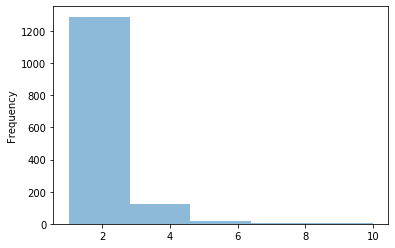

In [17]:
df_submit.plot.hist(bins=5, alpha=0.5)

## Distribution of Devices Use

In [18]:
device = df.groupby(["DEVICE"])["DEVICE"].count()
device = device.sort_values(ascending = False).head(20)
device

DEVICE
iPhone XR         510
iPhone 8 Plus     416
iPhone 7 Plus     299
iPhone XS Max     262
iPhone X          261
iPhone 7          231
iPhone 8          184
iPhone 6s Plus    137
iPhone 6s         125
SM-G960U          114
SM-N950U          101
iPhone12,1         91
iPhone XS          91
SM-N960U           84
iPhone12,5         84
SM-G965U           79
SM-G975U           65
iPhone 6           60
SM-G950U           59
SM-G955U           45
Name: DEVICE, dtype: int64

In [19]:
logins = df[ (df["RESPONSE_STATUS_ID"] == 300200) | (df["RESPONSE_STATUS_ID"] == 300100) ]
print ("Total Number of Logins: ",logins.shape[0])

Total Number of Logins:  2963


In [21]:
df["Time_Lag"] = (df["INSERT_TS"] - df["INSERT_TS"].shift(1,fill_value=0) ).dt.total_seconds()
df["Device_Lag"] = df["DEVICE"].shift(1,fill_value="None")


In [22]:
df.dtypes

INSERT_TS               datetime64[ns]
RESPONSE_STATUS_ID               int64
DEVICE                          object
DEVICE_OS                       object
MOBILE_SUBMISSION_ID            object
Size                             int64
Page Count                       int64
LAST_UPDATE_TS          datetime64[ns]
CLIENT_VERSION                  object
Time_Lag                       float64
Device_Lag                      object
dtype: object

In [23]:
df.head(20)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION,Time_Lag,Device_Lag
0,2019-10-28 02:02:27,300100,iPhone 6s Plus,13.1.3,NaN,0,0,2019-10-28 02:02:29,1.0.201910230000.2,1.572228e+09,None
1,2019-10-28 07:25:18,300100,SM-N960U1,28,NaN,0,0,2019-10-28 07:25:21,1.0,1.937100e+04,iPhone 6s Plus
2,2019-10-28 08:05:07,300100,SM-G960U,28,NaN,0,0,2019-10-28 08:05:12,1.0,2.389000e+03,SM-N960U1
3,2019-10-28 08:32:42,300100,SM-G960U,28,NaN,0,0,2019-10-28 08:32:46,1.0,1.655000e+03,SM-G960U
4,2019-10-28 08:33:43,300200,SM-G960U,28,NaN,0,0,2019-10-28 08:33:47,1.0,6.100000e+01,SM-G960U
5,2019-10-28 08:34:22,300100,SM-G960U,28,NaN,0,0,2019-10-28 08:34:22,1.0,3.900000e+01,SM-G960U
6,2019-10-28 08:57:13,300100,iPhone XS Max,13.1.3,NaN,0,0,2019-10-28 08:57:17,1.0.201910230000.2,1.371000e+03,SM-G960U
7,2019-10-28 08:59:24,300100,iPhone XR,13.1.2,NaN,0,0,2019-10-28 08:59:28,1.0.201910230000.2,1.310000e+02,iPhone XS Max
8,2019-10-28 08:59:28,400205,iPhone XS Max,13.1.3,c1420977-bc86-4734-9a1a-29a0b9953eed,10155392,4,2019-10-28 08:59:29,1.0.201910230000.2,4.000000e+00,iPhone XR
9,2019-10-28 09:00:34,400205,iPhone XS Max,13.1.3,bdb42832-2815-4798-a066-6b75963d459f,10155392,4,2019-10-28 09:00:35,1.0.201910230000.2,6.600000e+01,iPhone XS Max


In [24]:
df_Copy = df.copy()

In [25]:
df["RESPONSE_STATUS_ID"] = df["RESPONSE_STATUS_ID"].replace( [300200,300100,300202,400205,400100,], [1,2,3,4,5])

In [26]:
df.groupby(["RESPONSE_STATUS_ID"])["RESPONSE_STATUS_ID"].count()

RESPONSE_STATUS_ID
1    1119
2    1844
3       4
4      27
5    1439
Name: RESPONSE_STATUS_ID, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4433 entries, 0 to 4432
Data columns (total 11 columns):
INSERT_TS               4433 non-null datetime64[ns]
RESPONSE_STATUS_ID      4433 non-null int64
DEVICE                  4428 non-null object
DEVICE_OS               4428 non-null object
MOBILE_SUBMISSION_ID    1466 non-null object
Size                    4433 non-null int64
Page Count              4433 non-null int64
LAST_UPDATE_TS          4433 non-null datetime64[ns]
CLIENT_VERSION          4428 non-null object
Time_Lag                4433 non-null float64
Device_Lag              4428 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 381.1+ KB


In [28]:
df.set_index("INSERT_TS", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4433 entries, 2019-10-28 02:02:27 to 2019-11-01 16:33:05
Data columns (total 10 columns):
RESPONSE_STATUS_ID      4433 non-null int64
DEVICE                  4428 non-null object
DEVICE_OS               4428 non-null object
MOBILE_SUBMISSION_ID    1466 non-null object
Size                    4433 non-null int64
Page Count              4433 non-null int64
LAST_UPDATE_TS          4433 non-null datetime64[ns]
CLIENT_VERSION          4428 non-null object
Time_Lag                4433 non-null float64
Device_Lag              4428 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 381.0+ KB


In [29]:
df.head(20)

,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION,Time_Lag,Device_Lag
INSERT_TS,,,,,,,,,,
2019-10-28 02:02:27,2,iPhone 6s Plus,13.1.3,NaN,0,0,2019-10-28 02:02:29,1.0.201910230000.2,1.572228e+09,None
2019-10-28 07:25:18,2,SM-N960U1,28,NaN,0,0,2019-10-28 07:25:21,1.0,1.937100e+04,iPhone 6s Plus
2019-10-28 08:05:07,2,SM-G960U,28,NaN,0,0,2019-10-28 08:05:12,1.0,2.389000e+03,SM-N960U1
2019-10-28 08:32:42,2,SM-G960U,28,NaN,0,0,2019-10-28 08:32:46,1.0,1.655000e+03,SM-G960U
2019-10-28 08:33:43,1,SM-G960U,28,NaN,0,0,2019-10-28 08:33:47,1.0,6.100000e+01,SM-G960U
2019-10-28 08:34:22,2,SM-G960U,28,NaN,0,0,2019-10-28 08:34:22,1.0,3.900000e+01,SM-G960U
2019-10-28 08:57:13,2,iPhone XS Max,13.1.3,NaN,0,0,2019-10-28 08:57:17,1.0.201910230000.2,1.371000e+03,SM-G960U
2019-10-28 08:59:24,2,iPhone XR,13.1.2,NaN,0,0,2019-10-28 08:59:28,1.0.201910230000.2,1.310000e+02,iPhone XS Max
2019-10-28 08:59:28,4,iPhone XS Max,13.1.3,c1420977-bc86-4734-9a1a-29a0b9953eed,10155392,4,2019-10-28 08:59:29,1.0.201910230000.2,4.000000e+00,iPhone XR


In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})



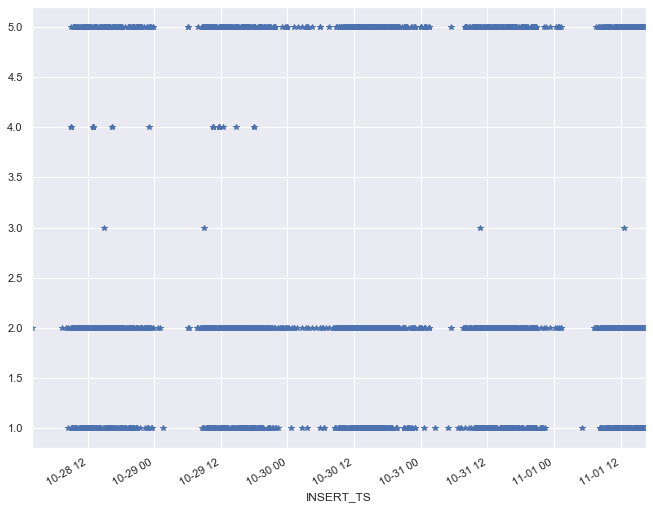

In [31]:
#df["RESPONSE_STATUS_ID"].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True))

df["RESPONSE_STATUS_ID"].plot(marker='*', linestyle='None',figsize=(11, 9))

In [35]:
df[ (df["DEVICE"] == df["Device_Lag"]) & (df["Time_Lag"] < 180) & (df["RESPONSE_STATUS_ID"] == 1) ]


,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION,Time_Lag,Device_Lag
INSERT_TS,,,,,,,,,,
2019-10-28 08:33:43,1,SM-G960U,28,NaN,0,0,2019-10-28 08:33:47,1.0,61.0,SM-G960U
2019-10-28 09:08:27,1,iPhone 8 Plus,13.1.2,NaN,0,0,2019-10-28 09:08:27,1.0.201910230000.2,69.0,iPhone 8 Plus
2019-10-28 09:49:39,1,LM-G820,28,NaN,0,0,2019-10-28 09:49:51,1.0,26.0,LM-G820
2019-10-28 09:54:54,1,LM-G820,28,NaN,0,0,2019-10-28 09:54:56,1.0,115.0,LM-G820
2019-10-28 11:01:46,1,iPhone XS Max,13.1.3,NaN,0,0,2019-10-28 11:01:46,1.0.201910230000.2,35.0,iPhone XS Max
...,...,...,...,...,...,...,...,...,...,...
2019-11-01 15:00:36,1,Pixel 2 XL,28,NaN,0,0,2019-11-01 15:00:36,1.0,41.0,Pixel 2 XL
2019-11-01 15:06:15,1,iPhone XS Max,13.1.3,NaN,0,0,2019-11-01 15:06:17,1.0.201910230000.2,35.0,iPhone XS Max
2019-11-01 15:11:05,1,iPhone 8,13.1.3,NaN,0,0,2019-11-01 15:11:05,1.0.201910230000.2,47.0,iPhone 8
